In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unzipping Dataset file from Google Drive

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/Deepfack.zip"

Archive:  /content/drive/MyDrive/Colab Notebooks/Deepfack.zip
   creating: Deepfack/
   creating: Deepfack/FK/
  inflating: Deepfack/FK/SF10_F1_S01_output.png  
  inflating: Deepfack/FK/SF10_F2_S02_output.png  
  inflating: Deepfack/FK/SF11_F1_S03_output.png  
  inflating: Deepfack/FK/SF11_F2_S04_output.png  
  inflating: Deepfack/FK/SF11_F3_S05_output.png  
  inflating: Deepfack/FK/SF11_F4_S06_output.png  
  inflating: Deepfack/FK/SF1_F10_H010_output.png  
  inflating: Deepfack/FK/SF1_F11_H011_output.png  
  inflating: Deepfack/FK/SF1_F12_H012_output.png  
  inflating: Deepfack/FK/SF1_F1_H01_output.png  
  inflating: Deepfack/FK/SF1_F2_H02_output.png  
  inflating: Deepfack/FK/SF1_F3_H03_output.png  
  inflating: Deepfack/FK/SF1_F4_H04_output.png  
  inflating: Deepfack/FK/SF1_F5_H05_output.png  
  inflating: Deepfack/FK/SF1_F6_H06_output.png  
  inflating: Deepfack/FK/SF1_F7_H07_output.png  
  inflating: Deepfack/FK/SF1_F8_H08_output.png  
  inflating: Deepfack/FK/SF1_F9_H09_output.p

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from PIL import Image


# Loading and preprocessing spectrogram images

In [ ]:
# Set the paths to the spectrogram folders
spectrogram_folder_real = '/content/Deepfack/RL'
spectrogram_folder_fake = '/content/Deepfack/FK'


# Function to load and preprocess spectrograms from PNG files
def load_spectrogram(file_path):
    image = Image.open(file_path)
    image = image.resize((desired_width, desired_height))
    spectrogram = np.array(image)
    return spectrogram

# Set the desired width and height of spectrograms
desired_width = 128
desired_height = 128


# Assigning labels for classification

In [ ]:

# Load spectrograms and assign labels
spectrograms_real = []
labels_real = []
for filename in os.listdir(spectrogram_folder_real):
    file_path = os.path.join(spectrogram_folder_real, filename)
    spectrogram = load_spectrogram(file_path)
    spectrograms_real.append(spectrogram)
    labels_real.append(0)

spectrograms_fake = []
labels_fake = []
for filename in os.listdir(spectrogram_folder_fake):
    file_path = os.path.join(spectrogram_folder_fake, filename)
    spectrogram = load_spectrogram(file_path)
    spectrograms_fake.append(spectrogram)
    labels_fake.append(1)

# Combine spectrograms and labels
spectrograms = np.concatenate((spectrograms_real, spectrograms_fake), axis=0)
labels = np.concatenate((labels_real, labels_fake), axis=0)



# Splitting the dataset into training and testing sets and reshaping the spectrograms

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spectrograms, labels, test_size=0.2, random_state=42)


# Reshape the spectrograms to match the input shape expected by the CNN model
X_train = X_train.reshape(X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))


# CNN model using Keras

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=X_train.shape[1:]), # 64 filter of size 3*3
    keras.layers.MaxPooling2D((2, 2)), #reducing the spatial dimensions of the feature maps
    keras.layers.Flatten(), #previous layer into a 1-dimensional vector
    keras.layers.Dense(128, activation='relu'), #128 units and ReLU activation function
    keras.layers.Dense(1, activation='sigmoid') # produces the final binary classification output
])


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64)



Epoch 1/10
11/11 [==============================] - 2s 29ms/step - loss: 939.7651 - accuracy: 0.5000
Epoch 2/10
11/11 [==============================] - 0s 26ms/step - loss: 50.0004 - accuracy: 0.4799
Epoch 3/10
11/11 [==============================] - 0s 26ms/step - loss: 20.8188 - accuracy: 0.4799
Epoch 4/10
11/11 [==============================] - 0s 26ms/step - loss: 39.6551 - accuracy: 0.4985
Epoch 5/10
11/11 [==============================] - 0s 26ms/step - loss: 17.0405 - accuracy: 0.5046
Epoch 6/10
11/11 [==============================] - 0s 26ms/step - loss: 7.6398 - accuracy: 0.5046
Epoch 7/10
11/11 [==============================] - 0s 26ms/step - loss: 6.5505 - accuracy: 0.5216
Epoch 8/10
11/11 [==============================] - 0s 26ms/step - loss: 2.2328 - accuracy: 0.5880
Epoch 9/10
11/11 [==============================] - 0s 26ms/step - loss: 2.0549 - accuracy: 0.6219
Epoch 10/10
11/11 [==============================] - 0s 28ms/step - loss: 1.5641 - accuracy: 0.6651


# Plotting the accuracy curve of the trained model during the training process.

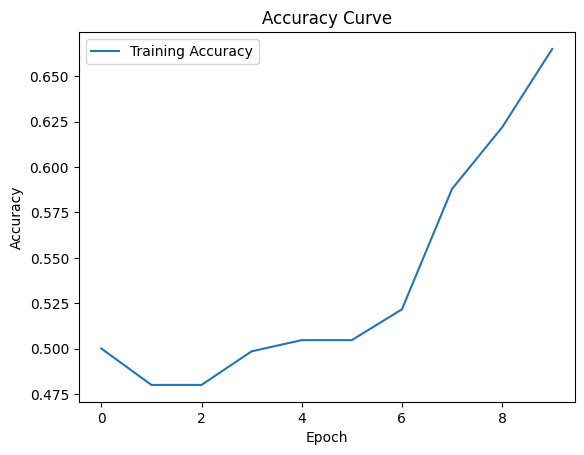

In [ ]:
# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

# Evaluating model performance with accuracy, precision, recall, and F1 score

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


6/6 [==============================] - 0s 4ms/step
Accuracy: 0.4691358024691358
Precision: 0.48360655737704916
Recall: 0.7195121951219512
F1 Score: 0.5784313725490197


# Visualizing performance metrics as a bar graph.

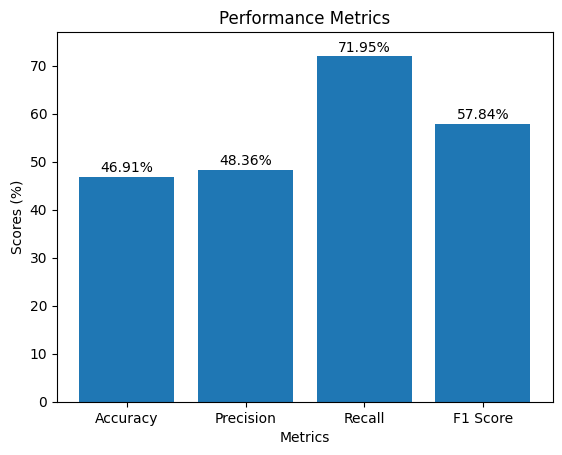

In [ ]:
import matplotlib.pyplot as plt

# Define the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Convert scores to percentages
scores = [score * 100 for score in scores]

# Plotting the bar graph
plt.bar(metrics, scores)
plt.ylim([0, 77])  # Set the y-axis limits between 0 and 100
plt.xlabel('Metrics')
plt.ylabel('Scores (%)')
plt.title('Performance Metrics')

# Add text labels for each bar
for i, score in enumerate(scores):
    plt.text(i, score + 1, f'{score:.2f}%', ha='center')

plt.show()
